In [1]:
import numpy as np

from astropy.table import QTable

import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/')
from rotation_curve_v2_1 import extract_data, calc_rot_curve
from dark_matter_mass_v1_2_plottingFunctions import plot_fitted_rot_curve, plot_fitted_rot_curve_mass

## Galaxies to plot

In [2]:
RUN_ALL_GALAXIES = True

FILE_IDS = ['7443-12705']

IMAGE_DIR = '../images/'

## Read in data

In [3]:
master_table = QTable.read( '../master_file_vflag_10.txt', format='ascii.ecsv')


MANGA_FOLDER = '../manga_files/MaNGA_DR15/'

# Create fitted rotation curve plots

In [4]:
if RUN_ALL_GALAXIES:
    for i in range(len(master_table)):
        
        #######################################################################
        # Construct galaxy ID
        #----------------------------------------------------------------------
        gal_ID = str(master_table['MaNGA_plate'][i]) + '-' + str(master_table['MaNGA_fiberID'][i])
        #----------------------------------------------------------------------
        
        
        #######################################################################
        # Plot fitted rotation curve
        #----------------------------------------------------------------------
        plot_fitted_rot_curve( gal_ID, master_table[i], IMAGE_DIR=IMAGE_DIR)
        #----------------------------------------------------------------------
        
else:
    for i in range(len(FILE_IDS)):
        
        #######################################################################
        # Find galaxy in master_table
        #----------------------------------------------------------------------
        plate, fiber = FILE_IDS[i].split('-')
        
        plate_boolean = master_table['MaNGA_plate'] == int(plate)
        fiber_boolean = master_table['MaNGA_fiberID'] == int(fiber)
        
        row = master_table[plate_boolean & fiber_boolean]
        
        print(row['avg_v_max'], row['rabsmag'][0])
        #----------------------------------------------------------------------
        
        
        #######################################################################
        # Plot fitted rotation curve
        #----------------------------------------------------------------------
        plot_fitted_rot_curve( FILE_IDS[i], row[0])
        #----------------------------------------------------------------------

/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/dark_matter_mass_v1_2.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  return v_max * (depro_radius / (r_turn**alpha + depro_radius**alpha)**(1/alpha))
/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/dark_matter_mass_v1_2.py:65: RuntimeWarning: divide by zero encountered in true_divide
  return v_max * (depro_radius / (r_turn**alpha + depro_radius**alpha)**(1/alpha))
/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/dark_matter_mass_v1_2.py:65: RuntimeWarning: invalid value encountered in true_divide
  return v_max * (depro_radius / (r_turn**alpha + depro_radius**alpha)**(1/alpha))
/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/dark_matter_mass_v1_2.py:65: RuntimeWarning: overflow encountered in power
  return v_max * (depro_radius / (r_turn**alpha + depro_radius**alpha)**(1/alpha))
/Users/kellydouglass/Documents/Research/Rotation_c

# Create fitted rotation curve plot with DM, $M_*$ curves

0.064473525


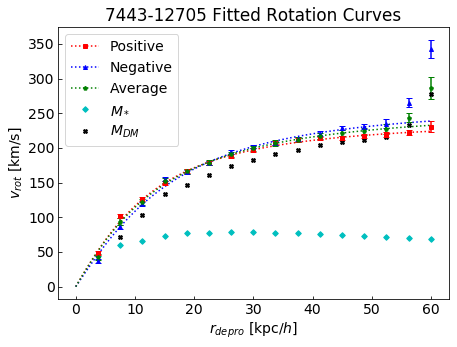

In [5]:
if RUN_ALL_GALAXIES:
    for i in range(len(master_table)):
        
        ############################################################################
        # Construct galaxy file name
        #---------------------------------------------------------------------------
        gal_ID = str(master_table['MaNGA_plate'][i]) + '-' + str(master_table['MaNGA_fiberID'][i])
        
        file_name = MANGA_FOLDER + str(master_table['MaNGA_plate'][i]) + '/manga-' \
                   + gal_ID + '.Pipe3D.cube.fits.gz'
        #---------------------------------------------------------------------------
        
        
        ############################################################################
        # Read data from fits file
        #---------------------------------------------------------------------------
        Ha_vel, Ha_vel_error, v_band, v_band_err, sMass_density,_,_,_,_ = extract_data( file_name)
        #---------------------------------------------------------------------------
        
        
        ############################################################################
        # Extract rotation curve data
        #---------------------------------------------------------------------------
        rot_data_table,_,_ = calc_rot_curve( Ha_vel, Ha_vel_error, v_band, 
                                             v_band_err, sMass_density, 
                                             master_table['NSA_ba'][i], 
                                             master_table['NSA_phi'][i], 
                                             master_table['NSA_redshift'][i], gal_ID)
        #---------------------------------------------------------------------------
        
        
        ############################################################################
        # Plot fitted rotation curve
        #---------------------------------------------------------------------------
        plot_fitted_rot_curve_mass( gal_ID, master_table[i], rot_data_table, IMAGE_DIR=IMAGE_DIR)
        #---------------------------------------------------------------------------
        
else:
    for i in range(len(FILE_IDS)):
        
        ############################################################################
        # Construct galaxy file name
        #---------------------------------------------------------------------------
        plate, fiber = FILE_IDS[i].split('-')
        
        file_name = MANGA_FOLDER + plate + '/manga-' + FILE_IDS[i] + '.Pipe3D.cube.fits.gz'
        #---------------------------------------------------------------------------
        
        
        ############################################################################
        # Read data from fits file
        #---------------------------------------------------------------------------
        Ha_vel, Ha_vel_error, v_band, v_band_err, sMass_density,_,_,_,_ = extract_data( file_name)
        #---------------------------------------------------------------------------
        
        
        ############################################################################
        # Find galaxy in master_table
        #---------------------------------------------------------------------------
        plate_boolean = master_table['MaNGA_plate'] == int(plate)
        fiber_boolean = master_table['MaNGA_fiberID'] == int(fiber)
        
        row = master_table[plate_boolean & fiber_boolean]
        print( row['NSA_redshift'][0])
        #---------------------------------------------------------------------------
        
        
        ############################################################################
        # Extract rotation curve data
        #---------------------------------------------------------------------------
        rot_data_table,_,_ = calc_rot_curve( Ha_vel, Ha_vel_error, v_band, 
                                             v_band_err, sMass_density, 
                                             row['NSA_ba'][0], row['NSA_phi'][0], 
                                             row['NSA_redshift'][0], FILE_IDS[i])
        #---------------------------------------------------------------------------
        
        
        ############################################################################
        # Plot fitted rotation curve
        #---------------------------------------------------------------------------
        plot_fitted_rot_curve_mass( FILE_IDS[i], row[0], rot_data_table)
        #---------------------------------------------------------------------------